L. Drew Hill

CE263N - Problem 4

November 17, 2016

In [1]:
import numpy as np
import pickle 
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import pyplot as plt
from pylab import *

# run matplotlib inline
%matplotlib inline

**Step 1** Run clicker.py at appropriate path (in current directory) and identify cars (left click) and non-cars (right-click). Close window, and np arrays automatically saved to the current directory. Because the "clicker.py" script flattens the information captured (4 points each [transparent, red, blue, green] for each pixel in a 20x20 pixel box centered at the point we clicked-- total of 1600 points per click), we need to unflatten it. This applies to every X-y pair in the numpy array (note the shape of each X array is 1600).

In [2]:
# Import numpy array of trained points
X_trn_og = np.load('X_trn.np')
Y_trn_og = np.load('Y_trn.np')

In [3]:
# make sure every array is 1600 pixels in size
boop = []

for i in xrange(X_trn_og.shape[0]):
    z = X_trn_og[i].shape
    boop = np.append(boop,z, 0)
np.unique(boop)

array([    0.,  1360.,  1600.])

Turns out some only were assigned 1360 or even 0 RGBT sets. So, adjust "unflattening" accordingly:

In [4]:
# unflatten / reshape each "X_trn" element
# take random sample of each sample (Virtual Sample)

X_trn = np.empty((0,4), float)
Y_trn = np.empty((0,), float)

for i in xrange(X_trn_og.shape[0]):
    # produce [R,G,B,T,car,i] * [pixel number per sample] array for each sample
        # determine length of new array
    row_num_newarray = X_trn_og[i].shape[0]/ 4
    a = X_trn_og[i]
    a = a.reshape(row_num_newarray,4)
        # remove transparency element (4th element)
    b = np.delete(a, 3 , 1)     
        # create new element for "car" status
    car = np.array([Y_trn_og[i]] * row_num_newarray)        
        # append
    c = np.insert(b, 3,car, 1)
        
#         # random sample of 25% of each sample
#             # create index
#         idx = np.random.randint(10, size= row_num_newarray/4)
#         e = d[idx,:]

    # append to final array set
    X_trn = np.append(X_trn, c,0)          # stack onto X_trn array
    Y_trn = np.append(Y_trn, car,0)

In [5]:
## Plot
def plot_RGB_3d():
    X_cars = X_trn[X_trn[:,3] == 1]
    X_notcars = X_trn[X_trn[:,3] == 0]

    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(121, projection='3d')

    ax.scatter(X_cars[:,0], X_cars[:,1], X_cars[:,1], c='r', marker='o')
    ax.scatter(X_notcars[:,0], X_notcars[:,1], X_notcars[:,3], c='b', marker='^')

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title("Pixels delineated by Car vs. non-car sample in 3d, RGB")

    # Project data to X/Y plane - RG
    ax2d = fig.add_subplot(122)
    ax2d.scatter(X_cars[:,0], X_cars[:,1], c='r', marker='o')
    ax2d.scatter(X_notcars[:,0], X_notcars[:,1], c='g', marker='^')

    ax2d.set_xlabel('Red')
    ax2d.set_ylabel('Green')
    ax2d.set_title("Pixels delineated by Car vs. non-car sample; red and green only")
    
#     # Project data to X/Y plane - RB
#     ax3d = fig.add_subplot(122)
#     ax3d.scatter(X_cars[:,0], X_cars[:,2], c='r', marker='o')
#     ax3d.scatter(X_notcars[:,0], X_notcars[:,2], c='b', marker='^')

#     ax3d.set_xlabel('Red')
#     ax3d.set_ylabel('Blue')
#     ax3d.set_title("Pixels delineated by Car vs. non-car sample; red and blue only")

#     # Project data to X/Y plane - BG
#     ax2d = fig.add_subplot(122)
#     ax2d.scatter(X_cars[:,2], X_cars[:,1], c='b', marker='o')
#     ax2d.scatter(X_notcars[:,2], X_notcars[:,1], c='g', marker='^')

#     ax2d.set_xlabel('Blue')
#     ax2d.set_ylabel('Green')
#     ax2d.set_title("Pixels delineated by Car vs. non-car sample; blue and green only")


    plt.show()

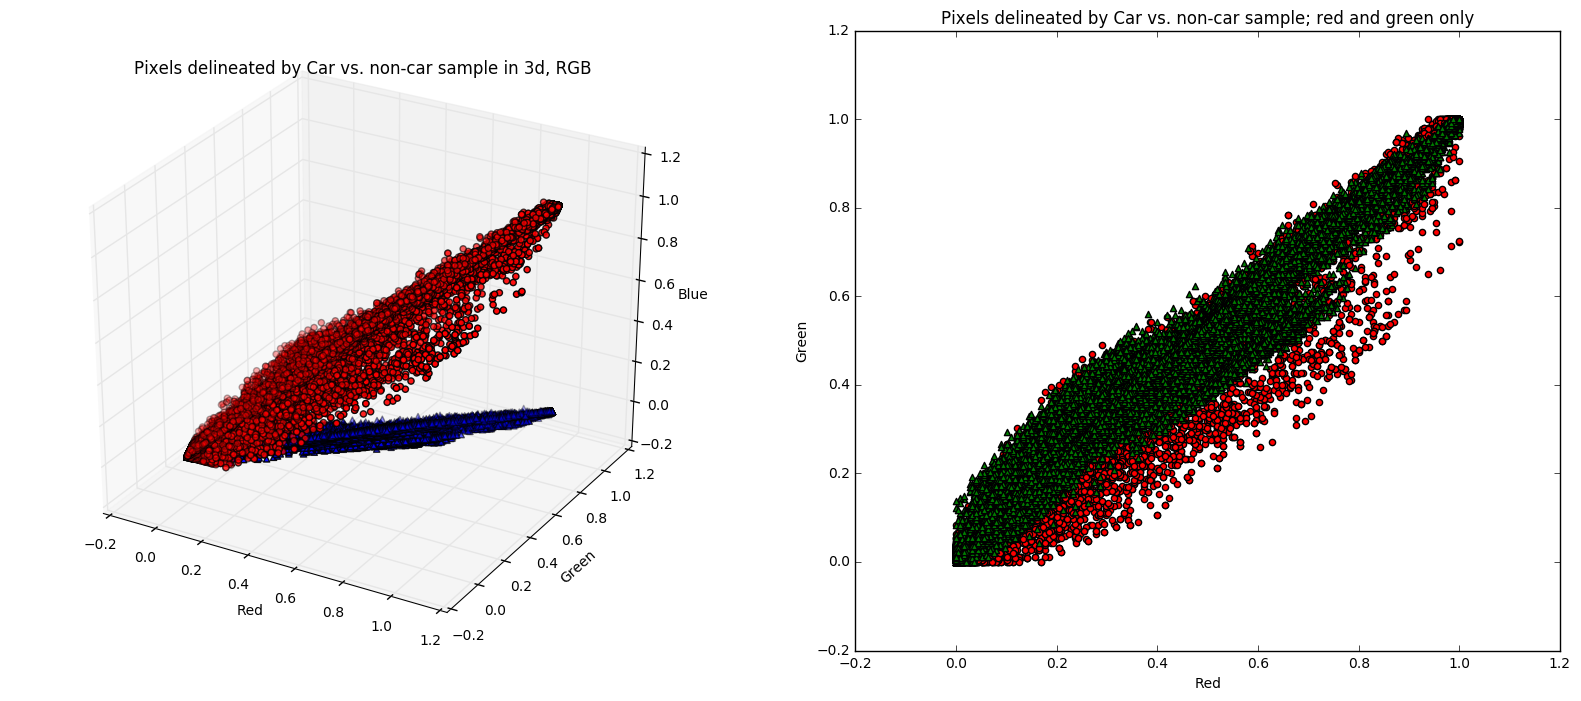

In [6]:
plot_RGB_3d()

**Step 2** Create a support vector machine classifier, using different classifiers.

In [ ]:
kernel = 'linear'
clf_l = svm.SVC(kernel = kernel,C=10000.0)
clf_l.fit(X_trn[:,:-1], Y_trn)

In [18]:
# kernel = 'rbf'
# clf_rbf = svm.SVC(kernel = kernel,C=100.0)
# clf_rbf.fit(X_trn[:,:-1], Y_trn)

In [10]:
kernel = 'poly'
clf_p = svm.SVC(kernel = kernel,C=100.0)
clf_p.fit(X_trn[:,:-1], Y_trn)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Step 3** Pickle my classifier.

In [ ]:
with open('classifier_DrewHill_linear_C10000.pickle','wb') as f: 
    pickle.dump(clf_l, f)

**Step 4** My Submission (as tested on the 'preview' data)

In [ ]:
import numpy as np
import pickle 

from matplotlib import pyplot as plt
from pylab import *


### this will be replaced with the real test image ###
im_test = plt.imread('parking_test_preview.png')
###


# This function MUST take locations (loc) and an image (im) 
# as input parameters and return the feature vector
def my_feature_vector(loc, im, size = 10):
  w = size
  # a patch of the size w cenetered at loc is extracted as a feature vector
  patch = im[loc[1]-w:loc[1]+w, loc[0]-w:loc[0]+w]
  p = np.array(patch).flatten()
  return p 
  

## 10 preview test locations
### these will be replaced with the real set of 100 test locations ###
test_locs_labs = np.load('test_locations_and_labels_preview.np')

test_locs   = test_locs_labs[:,0:2]
test_labels = test_locs_labs[:,2]

X_test = []
for loc in test_locs:
  X_test.append( my_feature_vector(loc, im_test) )


###### 
# Feature selection

## load classifier
my_classifier = pickle.load(open('classifier_DrewHill_linear_truncated.pickle')) 


def drew_predict(X):
    X_i = np.empty((0,3), float)

    for i in xrange(np.array(X).shape[0]):
        row_num_newarray = np.array(X).shape[0]/ 4
        a = np.array(X)
        a = a.reshape(row_num_newarray,4)
        b = np.delete(a, 3 , 1)     
    #     car = np.array([test_locs_labs[i,2]] * row_num_newarray)        
    #     c = np.insert(b, 3,car, 1)
        
        x_i = np.empty((0,), int)
        
        for i in xrange(b.shape[0]):
            boop = my_classifier.predict(b[i])
            x_i = np.append(x_i, boop, 0)
   
        predicted = int(round(np.mean(x_i)))

        return predicted
    return predicted

## perform classification

score = 0
for i, xtest in enumerate(X_test): 
  
  predicted = drew_predict(xtest)
  
  if (test_labels[i] == 1.0)&(predicted == 1.0):
     score = score + 2
  
  if (test_labels[i] == 1.0)&(predicted == 0.0):
     score = score - 0.5
  
  if (test_labels[i] == 0.0)&(predicted == 1.0):
     score = score - 0.5
  
  if (test_labels[i] == 0.0)&(predicted == 0.0):
     score = score + 0.25
     
  print test_labels[i], predicted, score 

print 'You final Score is: %.2f' % score